# W4 Assignment: Data Exploration
Authors: Jinyoung Suh, Harshitha Rasamsetty

Date: 24-09-2024

- In your Jupyter notebook report, complete the following:

    1. Document data context and data sampling in markdown
    2. Explore and interpret data structure, descriptive statistics, data quality, and variable relationships
    3. Explore data visually with appropriate visualizations
    4. Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers
    5. Perform data transformation as appropriate
    6. Create at least one new feature and document your approach
    7. Perform a dimensionality reduction method on the data and discuss
    8. Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

### Our team's foucs: Detecting Early Signs of COVID-19 Infection Using HRV Data
- Investigate whether changes in an individual's HRV patterns can predict the onset of COVID-19 symptoms. The goal is to determine if there are specific shifts in HRV metrics (such as a drop in variability or a rise in resting heart rate) that occur in the early stages of infection, even before noticeable symptoms appear.
- Source: https://github.com/Welltory/hrv-covid19/tree/master/data

### Exploring Data - hrv_measurement.csv, participants.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
hrv_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/hrv_measurements.csv')
participants_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/participants.csv')

#print(hrv_df.head())
#print(hrv_df.describe())
#print(hrv_df.info())

print(participants_df.head())
#print(participants_df.describe())
#print(participants_df.info())


    user_code gender age_range           city  country  height  weight  \
0  007b8190cf      m     25-34       Mandalay  Myanmar  170.18  96.162   
1  013f6d3e5b      f     18-24      São Paulo   Brazil  174.00  77.300   
2  01bad5a519      m     45-54  St Petersburg   Russia  178.00  92.000   
3  0210b20eea      f     25-34          Sochi   Russia  169.00  60.000   
4  024719e7da      f     45-54  St Petersburg   Russia  158.00  68.500   

  symptoms_onset  
0            NaN  
1      5/15/2020  
2       4/5/2020  
3       5/6/2020  
4      5/27/2020  


## Observation
#### 1. Missing Value
hrv_measurement.csv: Both columns's Non-Null Counts should be 3245, but they have data missing.
- Column 19:  how_sleep  /  1466  /     non-null    /    float64
- Column 20:  tags       / 2201   /     non-null    /    object 

participant.csv: The column count should be 185; however, a portion of the data is absent. We utilize specific data regarding the onset of symptoms in order to exclusively concentrate on said data.
- Column 7:   symptoms_onset   /   147   /    non-null   /   object 

#### 2. Duplicate

In [4]:
dup_check_hrv = hrv_df[hrv_df.duplicated()].shape[0]
dup_check_participants = participants_df[participants_df.duplicated()].shape[0]

print("Checking duplicate in drv_measurement.csv: ", dup_check_hrv)
print("Checking duplicate in participants.csv: ", dup_check_participants)

Checking duplicate in drv_measurement.csv:  0
Checking duplicate in participants.csv:  0


#### 3. Wrong symptoms_onset setting
- Some of the dates for symptoms_onset are incorrect. (e.g. July 7, 1987) It appears that they left their BOD here.
- Our solution: Remove that participant's data

In [5]:
participants_df.drop(columns=['city', 'country', 'height', 'weight'], inplace=True)
participants_df.dropna(inplace=True)
participants_df['symptoms_onset'] = pd.to_datetime(participants_df['symptoms_onset'])
participants_df = participants_df[participants_df['symptoms_onset'] >= '2020-01-01']

print(participants_df.shape)

(136, 4)


#### 4. Variable Relationship


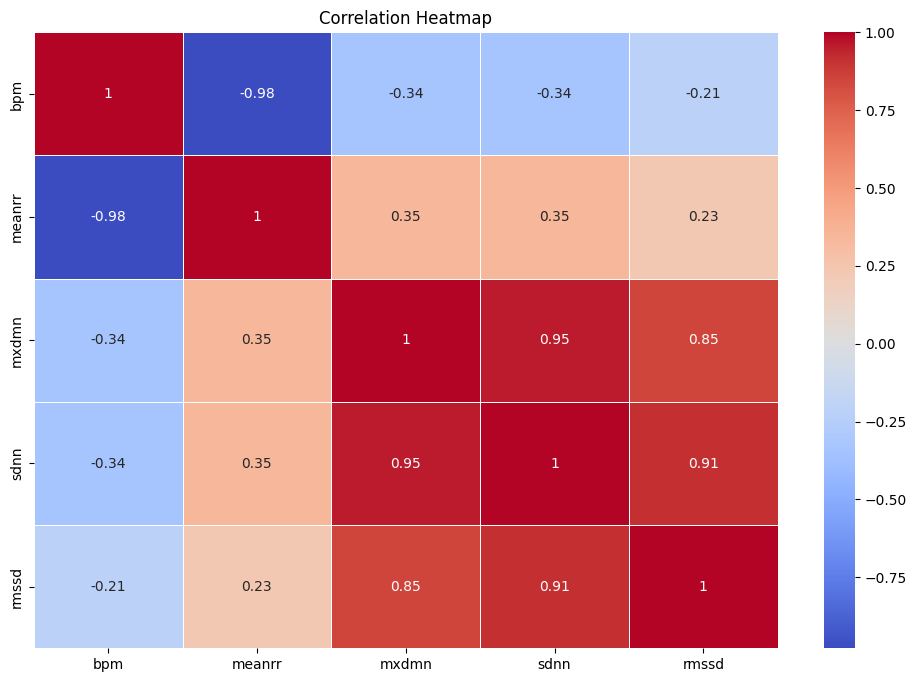

In [6]:
plt.figure(figsize=(12,8))
correlation_matrix = hrv_df[['bpm', 'meanrr', 'mxdmn', 'sdnn', 'rmssd']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()

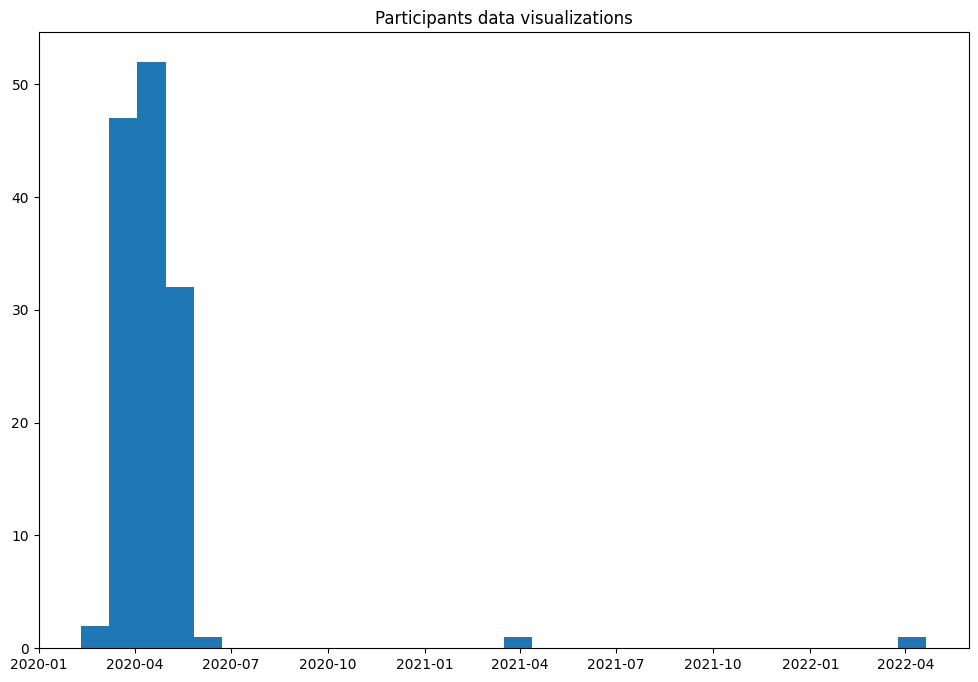

In [7]:
plt.figure(figsize=(12, 8))
plt.hist(data=participants_df, x='symptoms_onset', bins=30)
plt.title('Participants data visualizations')
plt.show()

### Handling Outliers

In [8]:
Q1 = hrv_df['bpm'].quantile(0.25)
Q3 = hrv_df['bpm'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

hrv_df = hrv_df[(hrv_df['bpm'] >= lower_bound) & (hrv_df['bpm'] <= upper_bound)]
print(hrv_df.shape[0])

3220


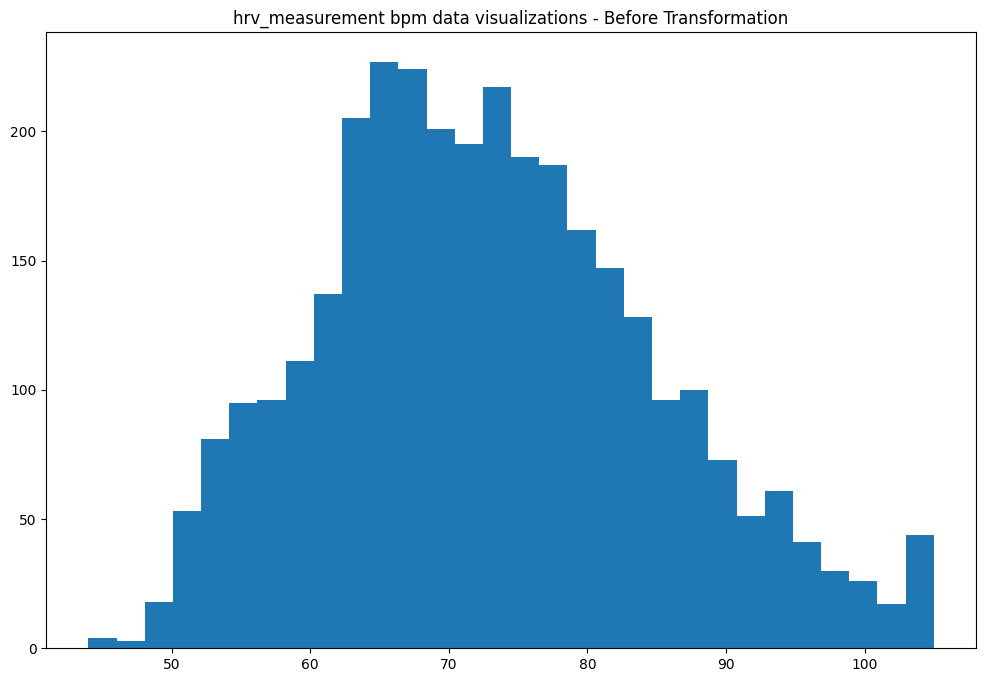

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(data=hrv_df, x='bpm', bins=30)
plt.title('hrv_measurement bpm data visualizations - Before Transformation')
plt.show()

##### Description of histogram: It has long-tail to the right(right skewed)

### Data Transformation

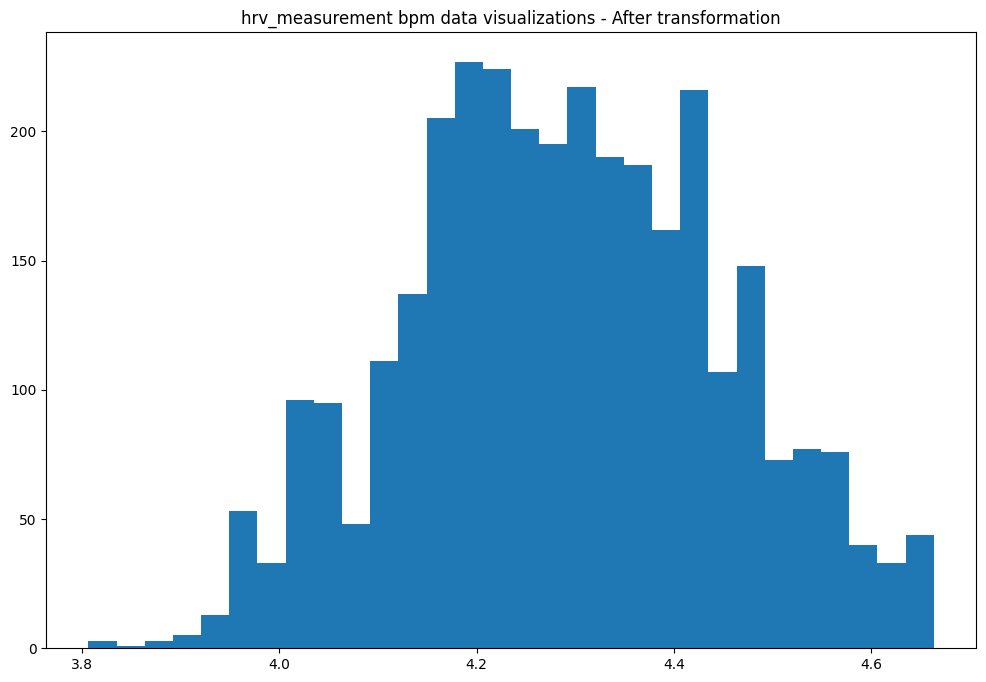

In [10]:
hrv_df['bpm'] = np.log1p(hrv_df['bpm'])

plt.figure(figsize=(12, 8))
plt.hist(data=hrv_df, x='bpm', bins=30)
plt.title('hrv_measurement bpm data visualizations - After transformation')
plt.show()


Creating a new feature: 
for our new feature we will create a binary feature called 'High BPM' based on the heart rate values. This will tell us if the bpm is above a threshold (80 bpm). This will be useful for classification tasks.

In [11]:
hrv_df['high_bpm'] = hrv_df['bpm'] > 80

Dimensionality Reduction:
The scatterplot shows the largest against second largest variance in the dataset.
We select the features from the dataset, apply PCA to reduce dimensionality to 2 components and plot the results.


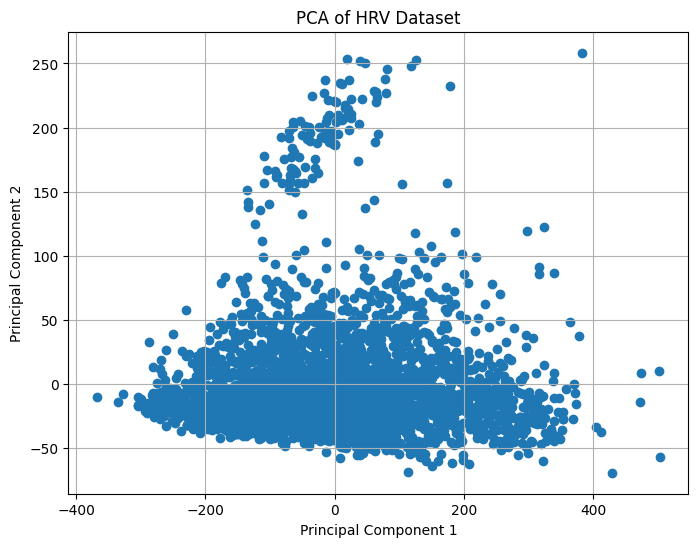

In [14]:
from sklearn.decomposition import PCA

features = ['bpm', 'meanrr', 'sdnn', 'rmssd']
X = hrv_df[features]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA of HRV Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


Interpretation:
- PCA reduces multiple features into 2 principal components
- the plot shows how the data is spread across these components
- this reduction simplifies the dataset while retaining most of the variance making it easier to identify patterns.

##Data Quality Assessment

Data Profiling:
Summary statistics was performed, providing insights into data distribution and key metrics.


Data Completeness:
Most columns are fully complete, except for 'symptoms_onset,' which has some missing values.


Data Accuracy and Consistency:
Height and weight values fall within expected ranges, suggesting accurate and consistent data entries.
Incorrectly entering a birthdate instead of a symptom onset date is an accuracy issue.

Data Consistency: Involves maintaining uniformity across datasets. If dates are inconsistently entered, it can lead to discrepancies.

Data Integrity:
User were unique because unique codes were used, ensuring each participant's data is distinct, maintaining dataset integrity.


Data Lineage and Provenance:
The dataset originates from Welltory HRV measurements and participant information. Understanding data collection methods would enhance validity of the knowledge.

Addressing such errors is crucial for maintaining high-quality data, especially in healthcare contexts where accurate records are vital for patient care and analysis.
Overall, the dataset appears to be of high enough quality, though further checks on missing data and measurement accuracy could provide additional assurance.